<div style="text-align: center"><b><span style="color:#08838b; font-family:Georgia; font-size:2.5em;">LearnPlatform COVID-19 Impact on Digital Learning</span></b></div>
<div style="width:100%;text-align: center;"> <img align=middle src="https://cdn.gstic.org/wp-content/uploads/2020/06/gstic-blog-digital-tech-in-education-new-answers.png" style="height:400px;margin-top:3rem;"> </div>
&nbsp;
<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Recent studies indicate that educational outcomes are far from impartiality and indifference. The COVID-19 pandemic only added to this imbalance. It has resulted in schools shut all across the world. Globally, over 1.2 billion children are out of the classroom. As a result, education has changed dramatically, with the distinctive rise of e-learning, whereby teaching is undertaken remotely and on digital platforms.
Research suggests that online learning has been shown to increase retention of information, and take less time, meaning the changes coronavirus have caused might be here to stay.</span></div>
&nbsp;
<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">
    This notebook is an attempt to uncover some trends in digital learning.</span></div>

# <div style="text-align: Left"><span style="color:#08838b; font-family:Georgia;">Problem Statement</span></div>
<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.</span></div>

# <div style="text-align: Left"><span style="color:#08838b; font-family:Georgia;">Questions that tackle the above problem statement </span></div>

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">    
<ul>
<li>What is the picture of digital connectivity and engagement in 2020?</li>
<li>What is the effect of the COVID-19 pandemic on online and distance learning, and how might this also evolve in the future?</li>
<li>How does student engagement with different types of education technology change over the course of the pandemic?</li>
<li>How does student engagement with online learning platforms relate to different geography? Demographic context (e.g., race/ethnicity, ESL, learning disability)? Learning context? Socioeconomic status?</li>
<li>Do certain state interventions, practices or policies (e.g., stimulus, reopening, eviction moratorium) correlate with the increase or decrease online engagement?</li>
</ul></span></div>

# <div style="text-align: Left"><span style="color:#08838b; font-family:Georgia;">Importing libraries that are required for this Analysis </span></div>

In [1]:
import numpy as np 
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium

# <div style="text-align: Left"><span style="color:#08838b; font-family:Georgia;">Data Definition</span></div>
<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;"><b>
    Engagement Data</b></span></div>

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">
    The engagement data are aggregated at school district level, and each file in the folder engagement_data represents data from one school district. The 4-digit file name represents district_id which can be used to link to district information in district_info.csv. The lp_id can be used to link to product information in product_info.csv.</span></div>
&nbsp;
<div style="text-align: justify"><table style="width:60%">
  <tr>
    <th align= "left">Name</th>
    <th align= "left">Description</th>
  </tr>

  <tr>
    <td>time</td>
    <td>date in "YYYY-MM-DD</td>
  </tr>
  <tr>
    <td>lp_id</td>
    <td>The unique identifier of the product</td>
  </tr>
  <tr>
    <td>pct_access</td>
    <td>Percentage of students in the district have at least one page-load event of a given product and on a given 
        day</td>
  </tr>
  <tr>
    <td>engagement_index</td>
    <td>Total page-load events per one thousand students of a given product and on a given day</td>
  </tr>
  
</table></div>

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;"><b>
    District information data</b></span></div>

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">
   The district file districts_info.csv includes information about the characteristics of school districts, including data from NCES (2018-19), FCC (Dec 2018), and Edunomics Lab. In this data set, we removed the identifiable information about the school districts. We also used an open source tool ARX (Prasser et al. 2020) to transform several data fields and reduce the risks of re-identification. For data generalization purposes some data points are released with a range where the actual value falls under. Additionally, there are many missing data marked as 'NaN' indicating that the data was suppressed to maximize anonymization of the dataset. </span></div>
&nbsp;
<div style="text-align: justify"><table style="width:80%">
  <tr>
    <th align= "left">Name</th>
    <th align= "left">Description</th>
  </tr>

  <tr>
    <td>district_id</td>
    <td>The unique identifier of the school district</td>
  </tr>
  <tr>
    <td>state</td>
    <td>The state where the district resides in</td>
  </tr>
  <tr>
    <td>locale</td>
    <td>NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and 
        Rural. See Locale Boundaries User's Manual for more information.</td>
  </tr>
  <tr>
    <td>pct_black/hispanic</td>
    <td>Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data</td>
  </tr>
  <tr>
    <td>pct_free/reduced</td>
    <td>Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES         
        data</td>
  </tr>
  <tr>
    <td>countyconnectionsratio</td>
    <td>ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on 
        the county level data from FCC From 477 (December 2018 version). See FCC data for more information.</td>
  </tr>
  <tr>
    <td>pptotalraw</td>
    <td>Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education 
        Resource Database on Schools (NERD&dollar;) project. The expenditure data are school-by-school, and we use the 
        median value to represent the expenditure of a given school district.</td>
  </tr>
</table></div>



<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;"><b>
    Product information data</b></span></div>

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">
    The product file products_info.csv includes information about the characteristics of the top 372 products with most users in 2020. The categories listed in this file are part of LearnPlatform's product taxonomy. Data were labeled by our team. Some products may not have labels due to being duplicate, lack of accurate url or other reasons.</span></div>
&nbsp;
<div style="text-align: justify"><table style="width:80%">
  <tr>
    <th align= "left">Name</th>
    <th align= "left">Description</th>
  </tr>

  <tr>
    <td>LP ID</td>
    <td>The unique identifier of the product</td>
  </tr>
  <tr>
    <td>URL</td>
    <td>Web Link to the specific product</td>
  </tr>
  <tr>
    <td>Product Name</td>
    <td>Name of the specific product</td>
  </tr>
  <tr>
    <td>Provider/Company Name</td>
    <td>Name of the product provider</td>
  </tr>
  <tr>
    <td>Sector(s)</td>
    <td>Sector of education where the product is used</td>
  </tr>
  <tr>
    <td>Primary Essential Function</td>
    <td>The basic function of the product. There are two layers of labels here. Products are first labeled as one of 
        these three categories: LC = Learning &amp; Curriculum, CM = Classroom Management, and SDO = School &amp; 
        District Operations. Each of these categories have multiple sub-categories with which the products were 
        labeled</td>
  </tr>
  
</table></div>

# <div style="text-align: Left"><span style="color:#08838b; font-family:Georgia;">Loading the dataset and reading its contents </span></div>

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">
    Let's load the engagement data first. Since, the engagement_data folder contains 233 csv files and each file in the folder engagement_data represents data from one school district, we have to join these csv files into one file so that we can work on it.</span></div>
&nbsp;   
&nbsp;
<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">
    The first step is to create a list of all the csv files stored in the folder engagement_data.</span></div>

In [2]:
path = '../input/learnplatform-covid19-impact-on-digital-learning/engagement_data'
files = glob.glob(os.path.join(path, "*.csv"))

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">
    To keep track of the file names as it is the only reference to the district (The 4-digit file name represents district_id which can be used to link to district information in district_info.csv), we have to create a list of dataframes with the filenames in a "district_id" column and then we can concatenate the items of the list into one dataframe.</span></div>
&nbsp;
<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">
    Here, we have used list comprehension to make a list of dataframes and then used concat function to combine the list items into one dataframe.</span></div>

In [3]:
list_of_df = [pd.read_csv(file).assign(district_id=os.path.basename(file).strip(".csv")) for file in files]
engagement = pd.concat(list_of_df, ignore_index=True)

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">We can see the size of dataframe named engagement after combining data from all the 233 csv files. </span></div>

In [4]:
engagement.shape

(22324190, 5)

In [5]:
engagement.head(10)

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,92844.0,0.01,0.68,6345
1,2020-01-01,64838.0,0.01,0.68,6345
2,2020-01-01,94058.0,0.00,NaN,6345
3,2020-01-01,26488.0,0.03,26.21,6345
4,2020-01-01,32340.0,0.01,0.11,6345
5,2020-01-01,95731.0,0.20,40.96,6345
6,2020-01-01,92918.0,0.01,4.54,6345
7,2020-01-01,17307.0,0.00,NaN,6345
8,2020-01-01,96255.0,0.01,0.11,6345
9,2020-01-01,83862.0,0.01,0.11,6345


<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Now, let's load the district information data with the alias name "district". </span></div>

In [6]:
district = pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')

In [7]:
district.shape

(233, 7)

In [8]:
district.head(10)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
8,9812,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
9,6584,North Carolina,Rural,"[0.4, 0.6[","[0.6, 0.8[","[0.18, 1[","[8000, 10000["


<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Finally, we will load the product information data with the alias name "product". </span></div>

In [9]:
product = pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv')

In [10]:
product.shape

(372, 6)

In [11]:
product.head(10)

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
5,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,PreK-12,LC - Digital Learning Platforms
6,18663,http://www.adaptedmind.com,AdaptedMind,GloWorld,PreK-12,LC - Digital Learning Platforms
7,65131,http://www.amplify.com/,Amplify,"Amplify Education, Inc.",PreK-12,LC - Courseware & Textbooks
8,26491,http://www.answers.com/,Answers,Answers,PreK-12; Higher Ed,LC - Study Tools - Q&A
9,56441,http://www.audible.com,Audible,"Amazon.com, Inc.",PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ..."


<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Let's find out the percentage of missing/null values in out dataset for each dataframe. we will use missingno library to visualize missing values. </span></div>

In [12]:
percent_missing_val_engagement = (engagement.isnull().sum().sort_values(ascending = False)/len(engagement))*100
percent_missing_val_engagement

engagement_index    24.092292
pct_access           0.060235
lp_id                0.002423
time                 0.000000
district_id          0.000000
dtype: float64

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">The below bar graph shows the number of non null entries in each column for the "engagement" dataset. </span></div>

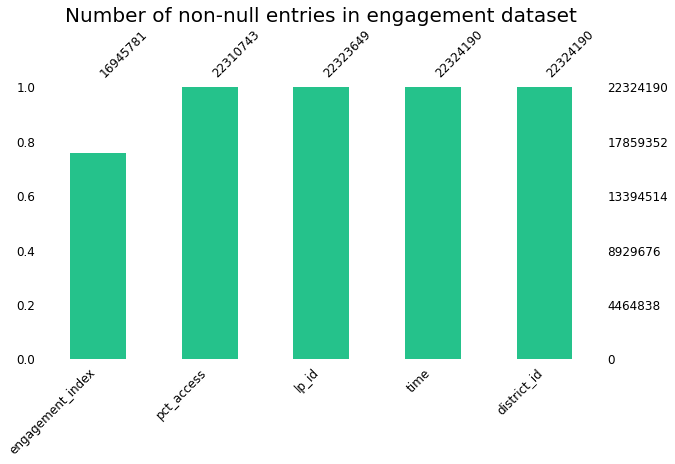

In [13]:
msno.bar(engagement, color='#25c28b', sort="ascending", figsize=(10,5), fontsize=12)
plt.title("Number of non-null entries in engagement dataset",font="Georgia", size=20)
plt.show()

In [14]:
percent_missing_val_district = (district.isnull().sum().sort_values(ascending = False)/len(district))*100
percent_missing_val_district

pp_total_raw                49.356223
pct_free/reduced            36.480687
county_connections_ratio    30.472103
state                       24.463519
locale                      24.463519
pct_black/hispanic          24.463519
district_id                  0.000000
dtype: float64

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">The below bar graph shows the number of non null entries in each column for the "district" dataset. </span></div>

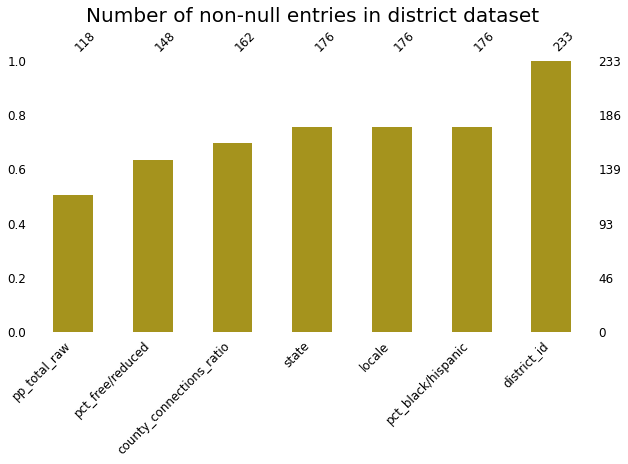

In [15]:
msno.bar(district, color='#a5931d', sort="ascending", figsize=(10,5), fontsize=12)
plt.title("Number of non-null entries in district dataset",font="Georgia", size=20)
plt.show()

In [16]:
percent_missing_val_product = (product.isnull().sum().sort_values(ascending = False)/len(product))*100
percent_missing_val_product

Sector(s)                     5.376344
Primary Essential Function    5.376344
Provider/Company Name         0.268817
LP ID                         0.000000
URL                           0.000000
Product Name                  0.000000
dtype: float64

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">The below bar graph shows the number of non null entries in each column for the "product" dataset. </span></div>

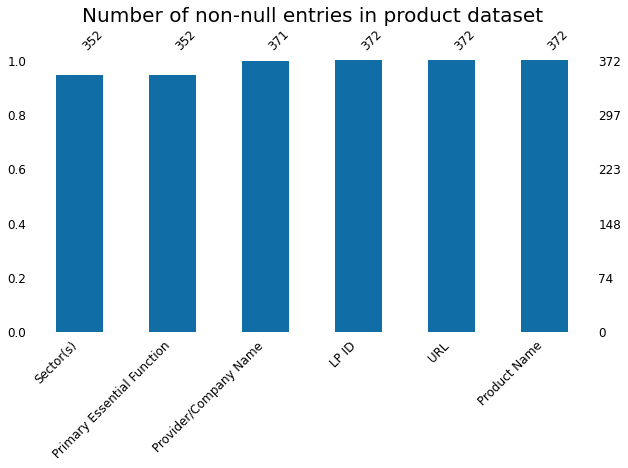

In [17]:
msno.bar(product, color='#116da5', sort="ascending", figsize=(10,5), fontsize=12)
plt.title("Number of non-null entries in product dataset",font="Georgia", size=20)
plt.show()

# <div style="text-align: Left"><span style="color:#08838b; font-family:Georgia;">Exploratory Data Analysis</span></div>

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Let's perform exploratory data analysis on the datasets that we have here. But before we do that, we have to change the data type of "time" column in "engagement" dataset from "object" to "int" so that we can perform some analysis on the dataset. Moreover, we have to add more columns into "engagement" dataset and map the "district_id" with "state" and "locale". </span></div>

In [18]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       object 
dtypes: float64(3), object(2)
memory usage: 851.6+ MB


<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Converting the data type of "time" column from "object" to "int64" </span></div>

In [19]:
convert_dict = {'district_id': 'int64'
               }
engagement = engagement.astype(convert_dict)
engagement['time'] = pd.to_datetime(engagement['time'])

In [20]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   time              datetime64[ns]
 1   lp_id             float64       
 2   pct_access        float64       
 3   engagement_index  float64       
 4   district_id       int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 851.6 MB


In [21]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Mapping the district_id to get associated state and locale and then adding it to the engagement dataset as individual columns. </span></div>

In [22]:
mapping_state = dict(district[['district_id', 'state']].values)
mapping_locale = dict(district[['district_id', 'locale']].values)
engagement['state'] = engagement['district_id'].map(mapping_state)
engagement['locale'] = engagement['district_id'].map(mapping_locale)
engagement.head(10)

,time,lp_id,pct_access,engagement_index,district_id,state,locale
0,2020-01-01,92844.0,0.01,0.68,6345,Massachusetts,Suburb
1,2020-01-01,64838.0,0.01,0.68,6345,Massachusetts,Suburb
2,2020-01-01,94058.0,0.00,NaN,6345,Massachusetts,Suburb
3,2020-01-01,26488.0,0.03,26.21,6345,Massachusetts,Suburb
4,2020-01-01,32340.0,0.01,0.11,6345,Massachusetts,Suburb
5,2020-01-01,95731.0,0.20,40.96,6345,Massachusetts,Suburb
6,2020-01-01,92918.0,0.01,4.54,6345,Massachusetts,Suburb
7,2020-01-01,17307.0,0.00,NaN,6345,Massachusetts,Suburb
8,2020-01-01,96255.0,0.01,0.11,6345,Massachusetts,Suburb
9,2020-01-01,83862.0,0.01,0.11,6345,Massachusetts,Suburb


<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Getting a picture of digital connectivity and engagement across states and locale in 2020.</span></div>

In [23]:
engagement_state = engagement[['pct_access', 'engagement_index', 'state']]
engagement_locale = engagement[['pct_access', 'engagement_index', 'locale']]

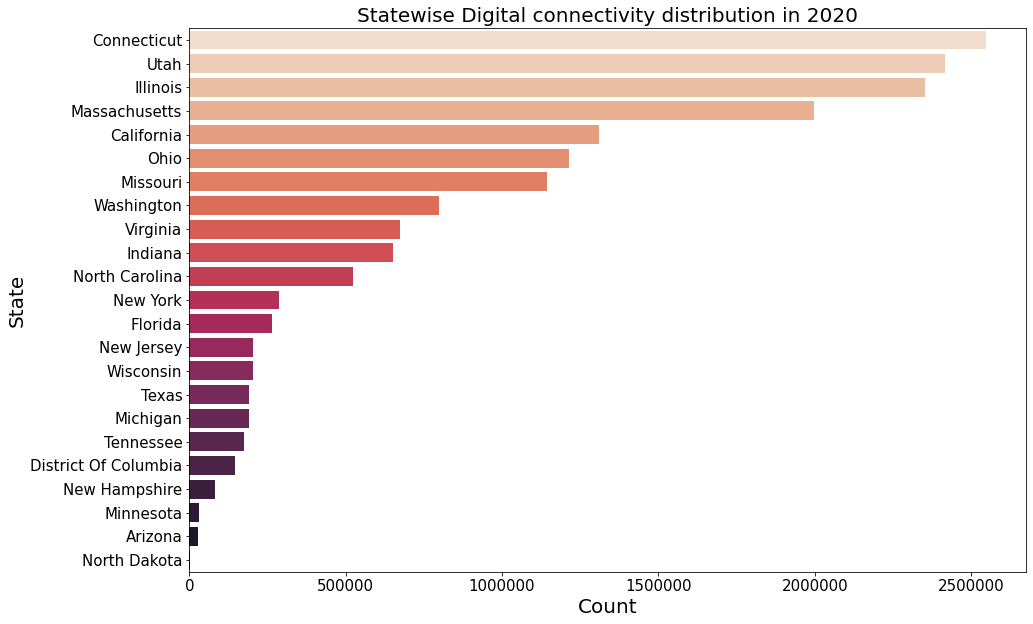

In [24]:
plt.figure(figsize=(15, 10))
plt.ticklabel_format(style='plain')
sns.countplot(y="state",data=engagement_state,order=engagement_state.state.value_counts().index,palette="rocket_r",linewidth=4)
plt.title("Statewise Digital connectivity distribution in 2020",font="Georgia", size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('State', fontsize=20)
plt.show()

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">From the above plot, we can see that 'Connecticut', 'Utah', 'Illinois', 'Massachusetts' and 'California' are the top five states with maximum number of counts/records in the engagement dataset.</span></div>

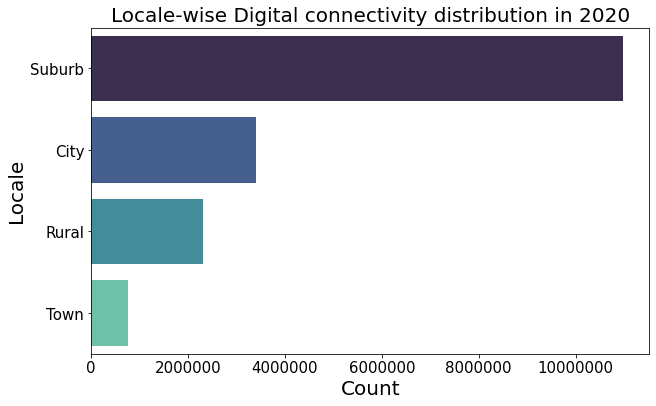

In [25]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
sns.countplot(y="locale",data=engagement_locale,order=engagement_locale.locale.value_counts().index,palette="mako",linewidth=3)
plt.title("Locale-wise Digital connectivity distribution in 2020",font="Georgia", size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Locale', fontsize=20)
plt.show()

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">The above plot tells that, Suburb records the maximum count of digital activity.</span></div>

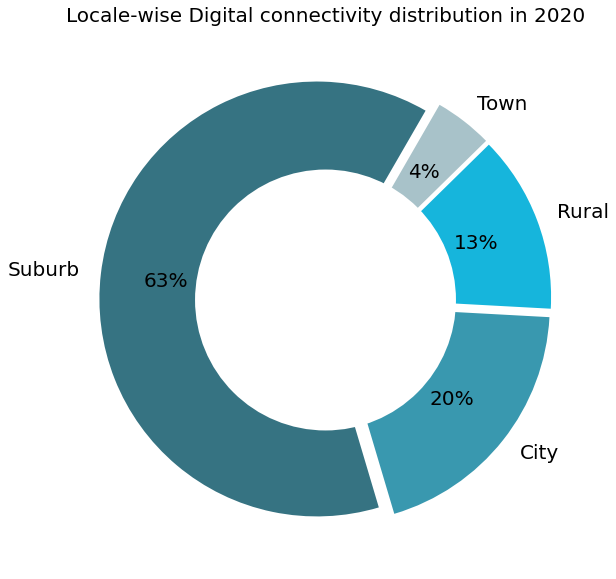

In [26]:
fig, ax  = plt.subplots(figsize=(15, 10))
explode = (0.04, 0.04, 0.04, 0.04)
labels = list(engagement_locale.locale.value_counts().index)
sizes = engagement_locale.locale.value_counts().values
patches, texts, autotexts = ax.pie(sizes, explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.7, colors=["#367382","#3998af","#16b5dc","#a8c2c9"])
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
texts[2].set_fontsize(20)
texts[3].set_fontsize(20)
autotexts[0].set_fontsize(20)
autotexts[1].set_fontsize(20)
autotexts[2].set_fontsize(20)
autotexts[3].set_fontsize(20)
ax.add_artist(plt.Circle((0,0),0.6,fc='white'))
font = {'fontname':'Georgia'}
plt.title('Locale-wise Digital connectivity distribution in 2020', fontsize = 20, **font)
plt.show()




In [27]:
district.head(20)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
8,9812,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
9,6584,North Carolina,Rural,"[0.4, 0.6[","[0.6, 0.8[","[0.18, 1[","[8000, 10000["


<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Removing all NAN values from state column of district dataset.</span></div>

In [28]:
district = district[district.state.notna()].reset_index(drop=True)

In [29]:
district.isna().sum()

district_id                  0
state                        0
locale                       0
pct_black/hispanic           0
pct_free/reduced            28
county_connections_ratio    14
pp_total_raw                58
dtype: int64

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Now, let's shows the distribution of districts in the states on a choropleth map to get a better view of the distribution.</span></div>

In [30]:
us_states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

district['state_code'] = district['state'].replace(us_states)
district_by_state = district['state_code'].value_counts().to_frame().reset_index(drop=False)
district_by_state.columns = ['state_code', 'num_districts']

fig = go.Figure()
layout = dict(
    title_text = "School Districts distribution per State",
    geo_scope='usa',
    
    
)

fig.add_trace(
    go.Choropleth(
        locations=district_by_state.state_code,
        zmax=1,
        z = district_by_state.num_districts,       
        locationmode = 'USA-states',  
        marker_line_color='white',
        geo='geo',
        colorscale=px.colors.sequential.Blues,
                            
    )
)
            
fig.update_layout(layout)   
fig.show()

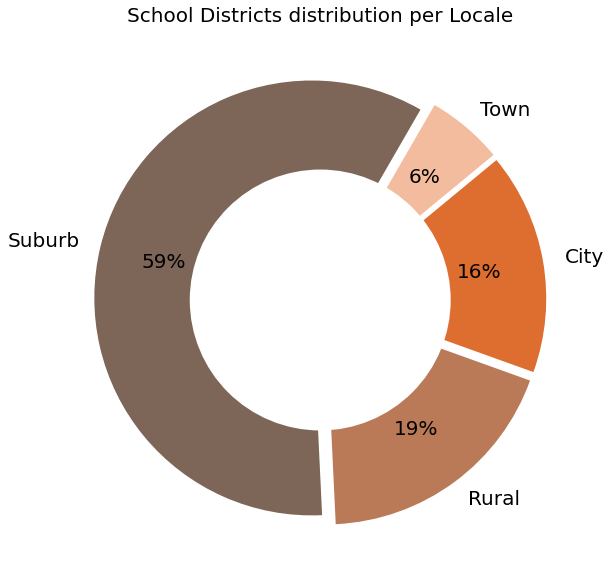

In [31]:
fig, ax  = plt.subplots(figsize=(15, 10))
explode = (0.04, 0.04, 0.04, 0.04)
labels = list(district.locale.value_counts().index)
sizes = district.locale.value_counts().values
patches, texts, autotexts = ax.pie(sizes, explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.7, colors=["#7d6558","#ba7a58","#de6d30","#f3bc9f"])
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
texts[2].set_fontsize(20)
texts[3].set_fontsize(20)
autotexts[0].set_fontsize(20)
autotexts[1].set_fontsize(20)
autotexts[2].set_fontsize(20)
autotexts[3].set_fontsize(20)
ax.add_artist(plt.Circle((0,0),0.6,fc='white'))
font = {'fontname':'Georgia'}
plt.title('School Districts distribution per Locale', fontsize = 20, **font)
plt.show()

In [32]:
product.head(10)

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
5,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,PreK-12,LC - Digital Learning Platforms
6,18663,http://www.adaptedmind.com,AdaptedMind,GloWorld,PreK-12,LC - Digital Learning Platforms
7,65131,http://www.amplify.com/,Amplify,"Amplify Education, Inc.",PreK-12,LC - Courseware & Textbooks
8,26491,http://www.answers.com/,Answers,Answers,PreK-12; Higher Ed,LC - Study Tools - Q&A
9,56441,http://www.audible.com,Audible,"Amazon.com, Inc.",PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ..."


In [33]:
product['Sector(s)'].nunique()

5

In [34]:
product['Primary Essential Function'].nunique()

35

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Since, the primary essential function column of the product dataset has two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled. So, we will split this column into primary_essential_category and primary_essential_subcategory columns respectively.</span></div>


In [35]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Splitting the 'Primary Essential Function' column into two sub-columns i.e. 'primary_essential_category' column and 'primary_essential_subcategory' column so that we can better understand the distribution of products.</span></div>

In [36]:
product['primary_essential_category'] = product['Primary Essential Function'].str.split(" - ",expand=True)[0]
product['primary_essential_subcategory'] = product['Primary Essential Function'].str.split(" - ",expand=True)[1]

In [37]:
product.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,primary_essential_category,primary_essential_subcategory
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms


<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Deleting the 'Primary Essential Function' column from the product dataset as it is no longer needed since we already have split it into two sub-columns.</span></div>

In [38]:
product.drop(['Primary Essential Function'], axis = 1, inplace = True)

In [39]:
product.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),primary_essential_category,primary_essential_subcategory
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC,Digital Learning Platforms


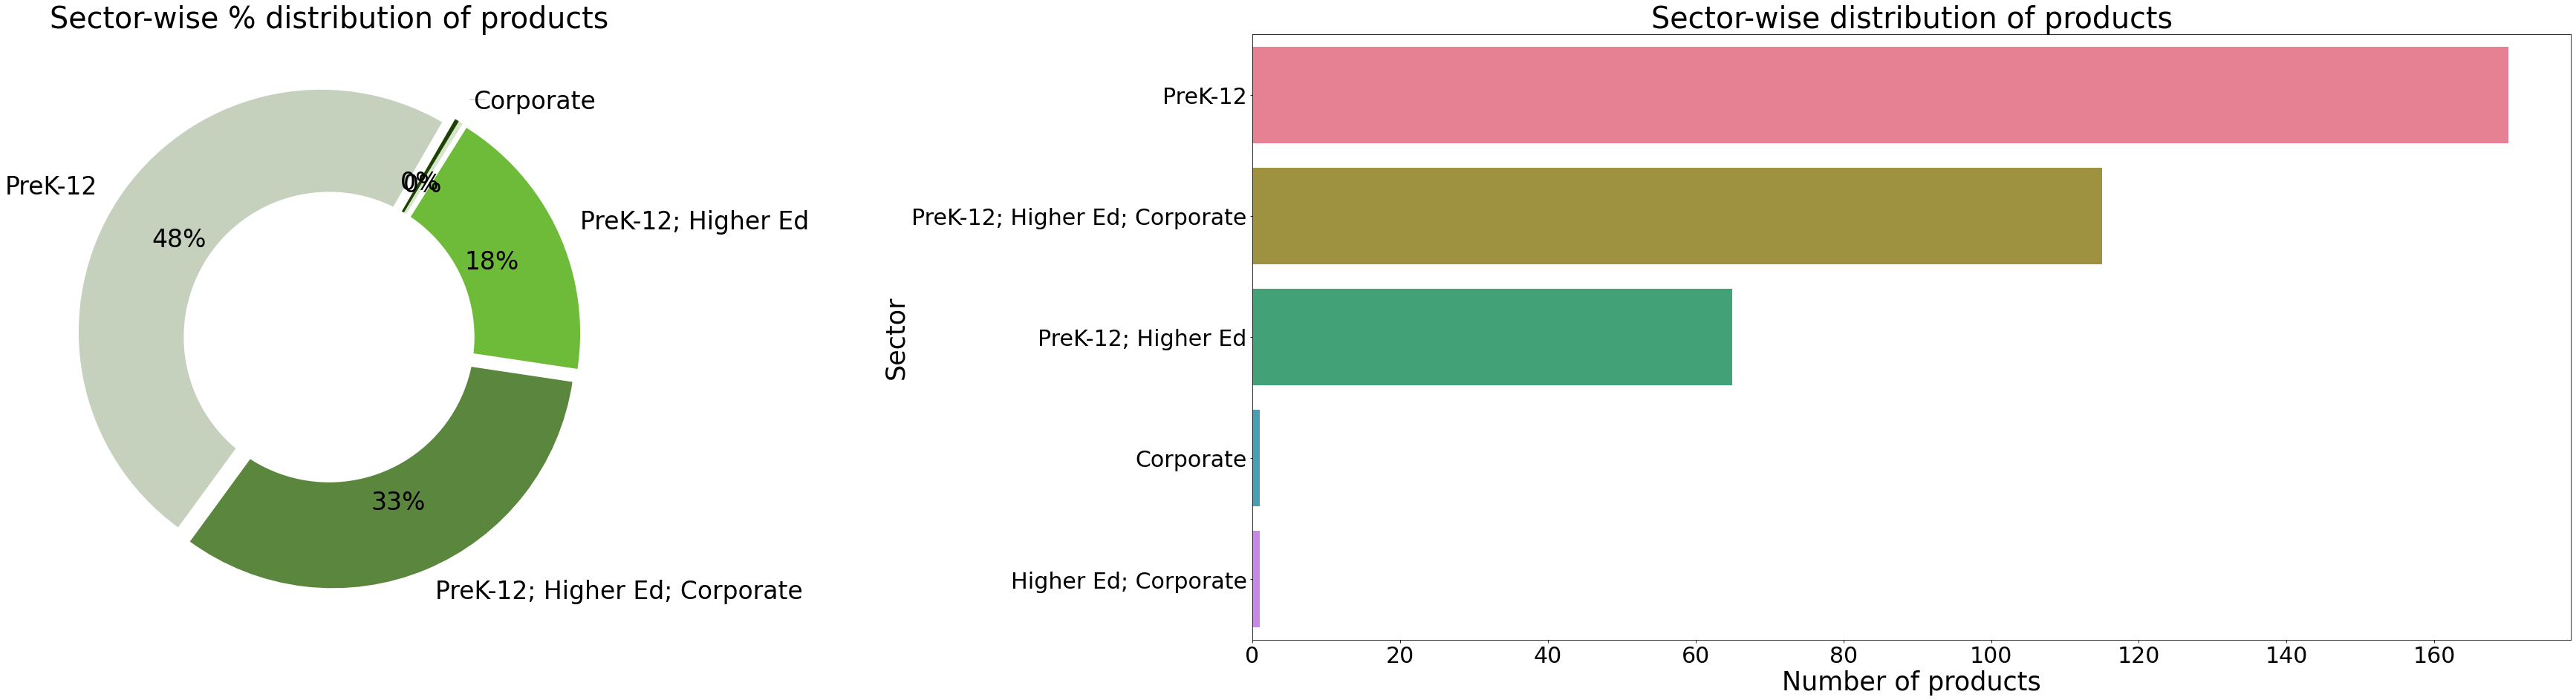

In [40]:
plt.rcParams.update({'font.size': 33,})
fig, ax  = plt.subplots(1, 2, figsize=(70, 15))
explode = (0.04, 0.04, 0.04, 0.04, 0.04)
labels = list(product['Sector(s)'].value_counts().index)
sizes = product['Sector(s)'].value_counts().values

patches, texts, autotexts = ax[0].pie(sizes, explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.7, colors=["#c5d0bd","#5b863e","#6ebb3a","#d4e5c8", "#1e4104"])

texts[4].set_fontsize(2)
ax[0].add_artist(plt.Circle((0,0),0.6,fc='white'))
font = {'fontname':'Georgia'}
ax[0].title.set_text('Sector-wise % distribution of products')



plt.ticklabel_format(style='plain')
sns.countplot(y="Sector(s)",data=product, ax=ax[1],order=product['Sector(s)'].value_counts().index,palette="husl",linewidth=3)
ax[1].title.set_text("Sector-wise distribution of products")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Number of products', fontsize=35)
plt.ylabel('Sector', fontsize=35)

plt.show()

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">We see that majority of products fall under the 'Prek-12' sector covering about 48% of the total products.</span></div>

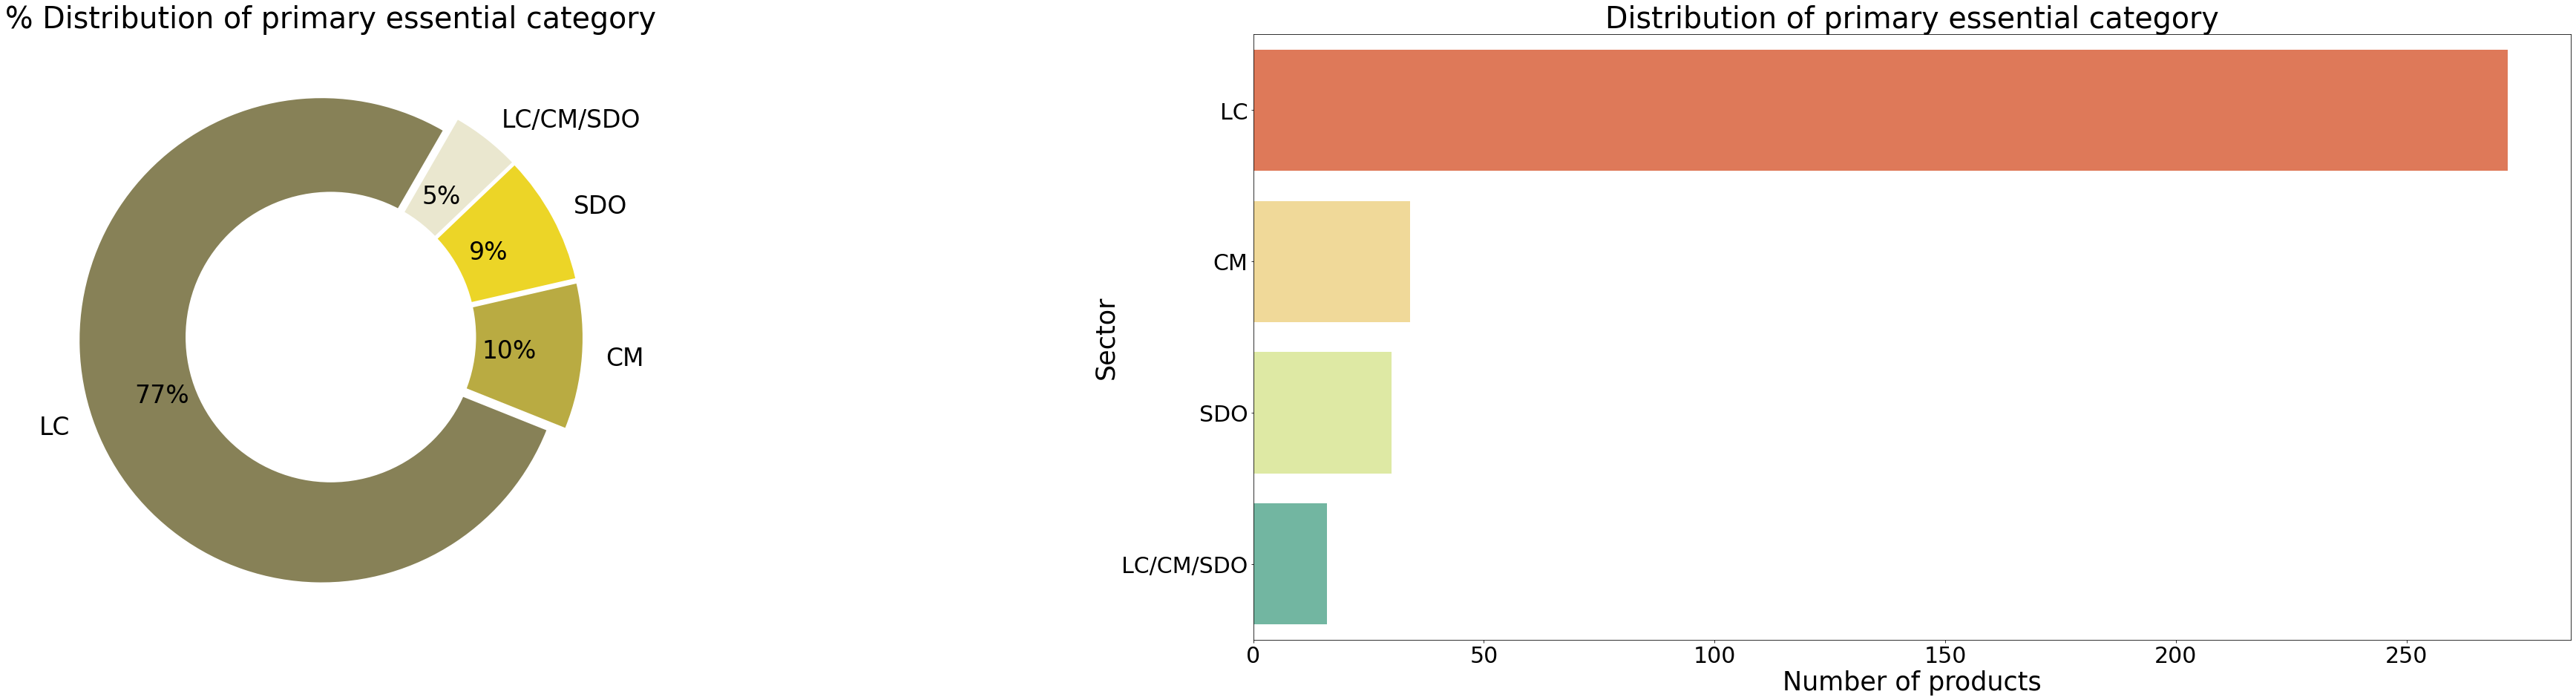

In [41]:
fig, ax  = plt.subplots(1, 2, figsize=(70, 15))
explode = (0.04, 0.04, 0.04, 0.04)
labels = list(product['primary_essential_category'].value_counts().index)
sizes = product['primary_essential_category'].value_counts().values

patches, texts, autotexts = ax[0].pie(sizes, explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.7, colors=["#878157","#b9ab42","#ecd527","#eae7cf"])


ax[0].add_artist(plt.Circle((0,0),0.6,fc='white'))
font = {'fontname':'Georgia'}
#plt.title('Sector-wise % distribution of products', fontsize = 30, **font)
ax[0].title.set_text('% Distribution of primary essential category')

plt.ticklabel_format(style='plain')
sns.countplot(y="primary_essential_category",data=product, ax=ax[1],order=product['primary_essential_category'].value_counts().index,palette="Spectral",linewidth=3)
ax[1].title.set_text("Distribution of primary essential category")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Number of products', fontsize=35)
plt.ylabel('Sector', fontsize=35)

plt.show()

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">The LC category which is 'Learning and Curriculum' category has the highest percentage of products.</span></div>

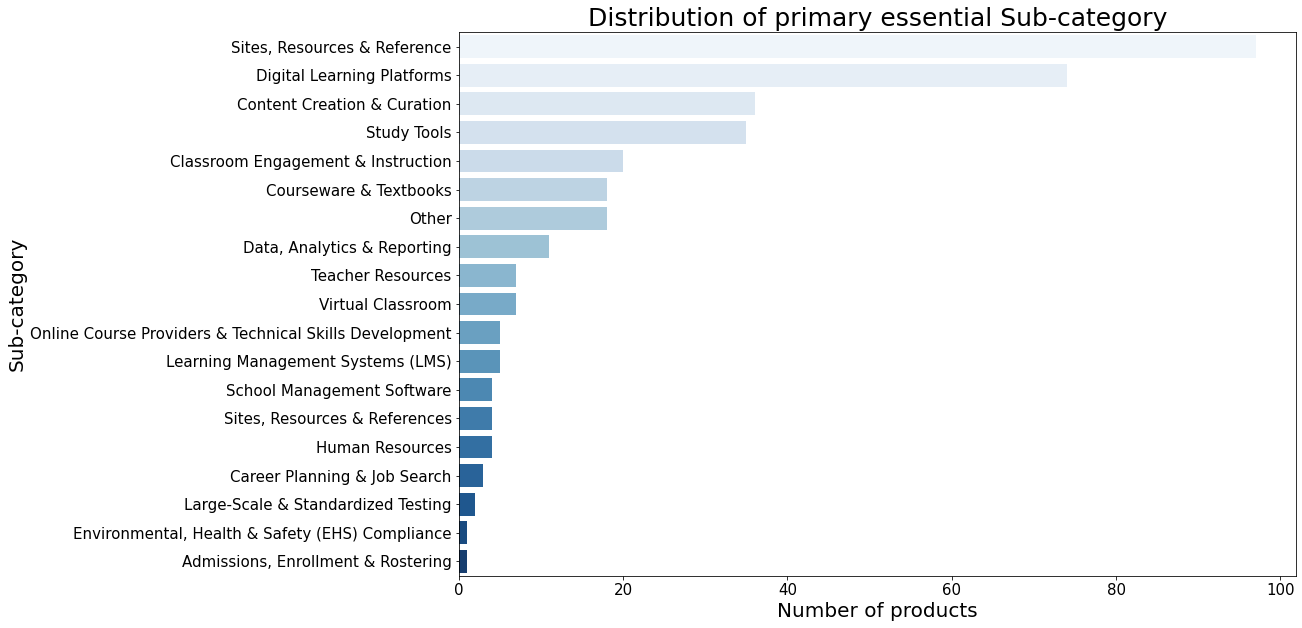

In [42]:
plt.figure(figsize=(15,10))
plt.ticklabel_format(style='plain')
sns.countplot(y="primary_essential_subcategory",data=product,order=product['primary_essential_subcategory'].value_counts().index,palette="Blues")
plt.title("Distribution of primary essential Sub-category",font="Georgia", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of products', fontsize=20)
plt.ylabel('Sub-category', fontsize=20)

plt.show()

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">"Sites, Resources and Reference" and "Digital Learning Platform " take the top spots in the list of primary essential sub-category. </span></div>

In [43]:
product.nunique()

LP ID                            372
URL                              372
Product Name                     372
Provider/Company Name            290
Sector(s)                          5
primary_essential_category         4
primary_essential_subcategory     19
dtype: int64

In [44]:
engagement.time.nunique()

366

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">We have 366 unique dates when the data was recorded. </span></div>

Text(0.5, 1.0, 'Districts with unique days of engagement ')

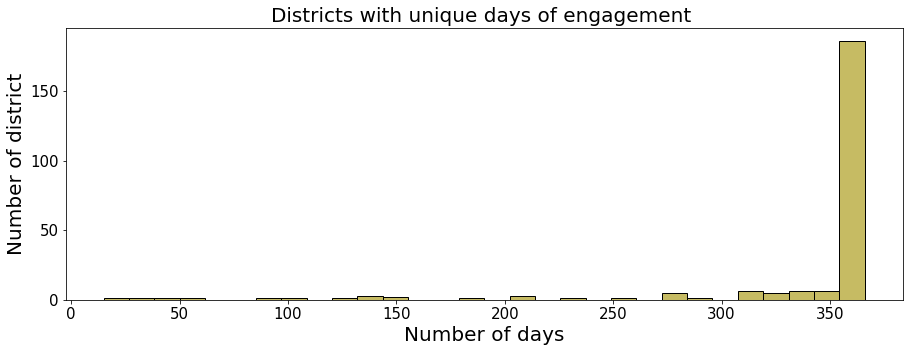

In [45]:
plt.figure(figsize=(15,5))

sns.histplot(engagement.groupby('district_id').time.nunique(), bins=30, color = '#b3a42f')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of days', fontsize=20)
plt.ylabel('Number of district', fontsize=20)
plt.title('Districts with unique days of engagement ', fontsize = 20)


<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">From the above histogram, we can see that majority of districts have engagement data for 366 days while some have data for less than 10 days or so.</span></div>

In [46]:
lp_id_virtual = product[product.primary_essential_subcategory == 'Virtual Classroom']['LP ID'].unique()

In [47]:
lp_id_virtual

array([48333, 32050, 61945, 18982, 99580, 98845, 22767])

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Let's understand the variation of "pct_access" data and "engagement_index" data over time.</span></div>

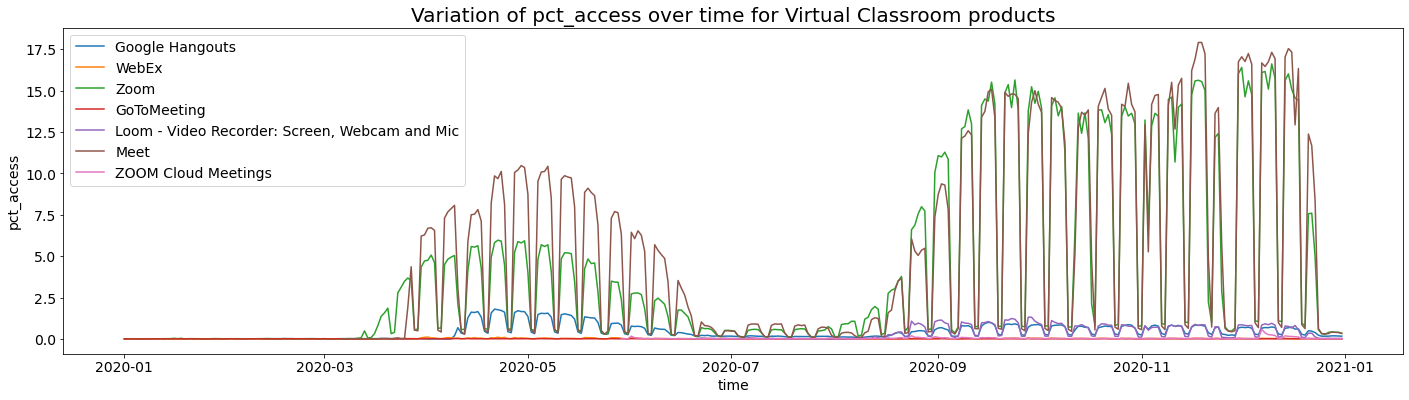

In [48]:
plt.rcParams.update({'font.size': 14,})
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

for product_id in lp_id_virtual:
    dummy = engagement[engagement.lp_id == product_id].groupby('time').pct_access.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=dummy.time, y=dummy.pct_access, label=product[product['LP ID'] == product_id]['Product Name'].values[0])
plt.legend()
plt.title('Variation of pct_access over time for Virtual Classroom products', fontsize = 20)
plt.show()

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">We see that with the engagement dataset containing weekends as well as weekdays data, the graph shows variation like the above with ripples. Since, people usually don't like to work on weekends which can be substantiated by the above graph, we can remove weekend data from our dataset.</span></div>

In [49]:
engagement['weekday'] = pd.DatetimeIndex(engagement['time']).weekday
engagement_updated = engagement[engagement.weekday < 5]

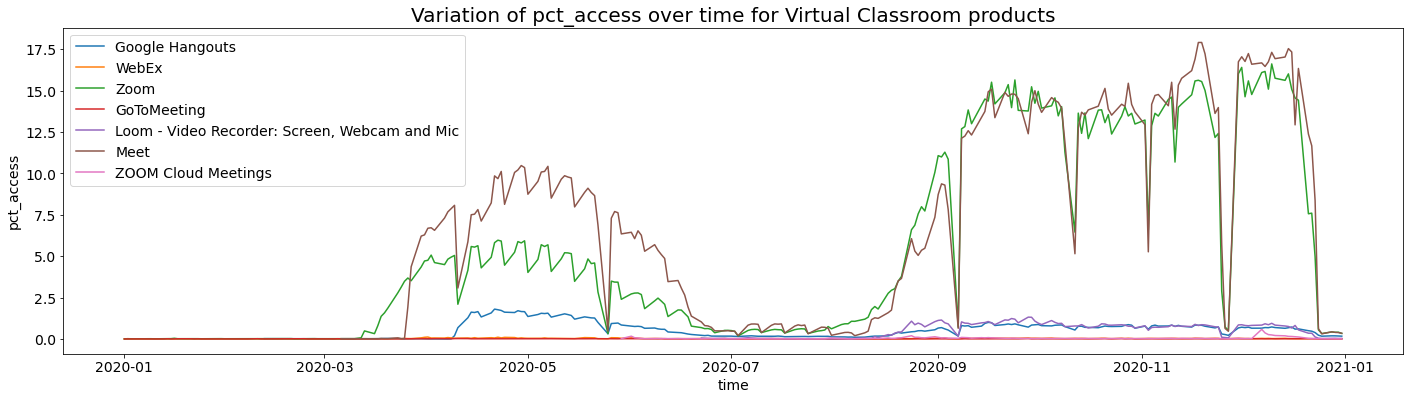

In [50]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

for product_id in lp_id_virtual:
    dummy = engagement_updated[engagement_updated.lp_id == product_id].groupby('time').pct_access.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=dummy.time, y=dummy.pct_access, label=product[product['LP ID'] == product_id]['Product Name'].values[0])
plt.legend()
plt.title('Variation of pct_access over time for Virtual Classroom products', fontsize = 20)
plt.show()

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Now the graph shows better variation of pct_access data without ripples which were earlier present because of weekend data in the dataset.</span></div>

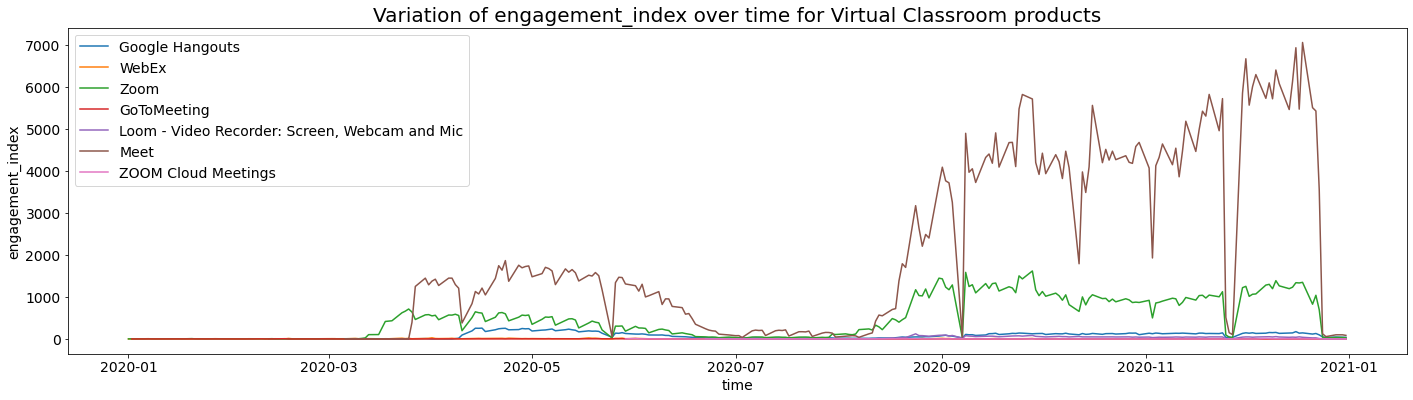

In [51]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
for product_id in lp_id_virtual:
    dummy = engagement_updated[engagement_updated.lp_id == product_id].groupby('time').engagement_index.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=dummy.time, y=dummy.engagement_index, label=product[product['LP ID'] == product_id]['Product Name'].values[0])
plt.legend()
plt.title('Variation of engagement_index over time for Virtual Classroom products', fontsize = 20)
plt.show()

In [52]:
engagement.lp_id.head()

0    92844.0
1    64838.0
2    94058.0
3    26488.0
4    32340.0
Name: lp_id, dtype: float64

In [53]:
lp_id_digital = product[product.primary_essential_subcategory == 'Digital Learning Platforms']['LP ID'].unique()

In [54]:
len(lp_id_digital)

74

In [55]:
lp_id_digital = [36692, 92993, 71279, 25559, 64998, 61441]

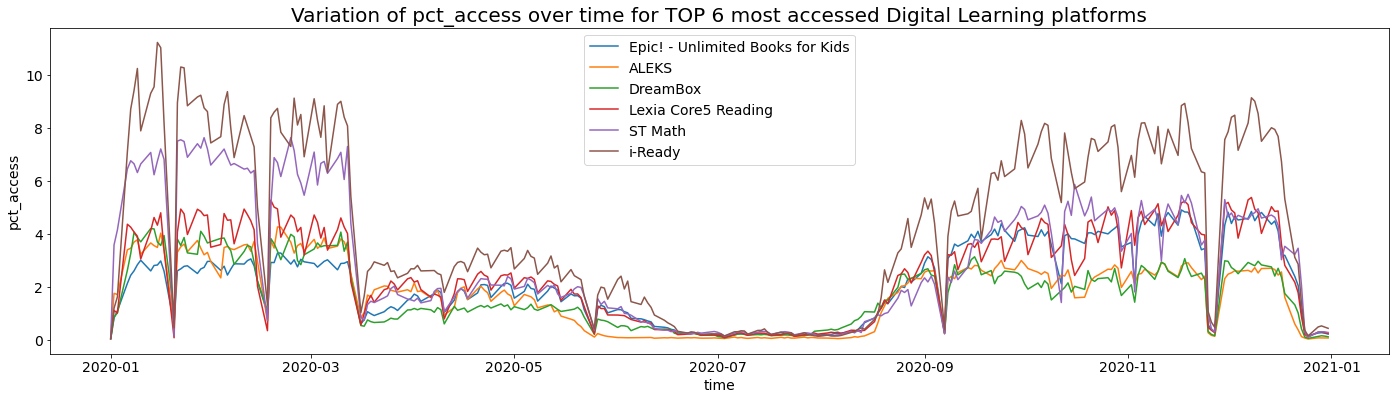

In [56]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

for product_id in lp_id_digital:
    dummy = engagement_updated[engagement_updated.lp_id == product_id].groupby('time').pct_access.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=dummy.time, y=dummy.pct_access, label=product[product['LP ID'] == product_id]['Product Name'].values[0])
plt.legend()
plt.title('Variation of pct_access over time for TOP 6 most accessed Digital Learning platforms', fontsize = 20)
plt.show()

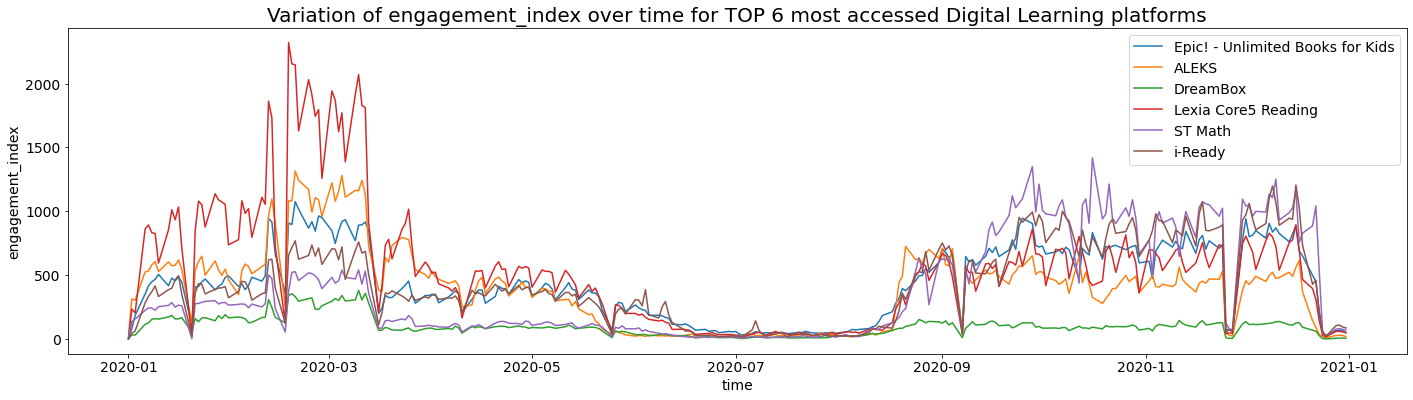

In [57]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

for product_id in lp_id_digital:
    dummy = engagement_updated[engagement_updated.lp_id == product_id].groupby('time').engagement_index.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=dummy.time, y=dummy.engagement_index, label=product[product['LP ID'] == product_id]['Product Name'].values[0])
plt.legend()
plt.title('Variation of engagement_index over time for TOP 6 most accessed Digital Learning platforms', fontsize = 20)
plt.show()

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">The below plots show the top 5 products from each sub-category.</span></div>

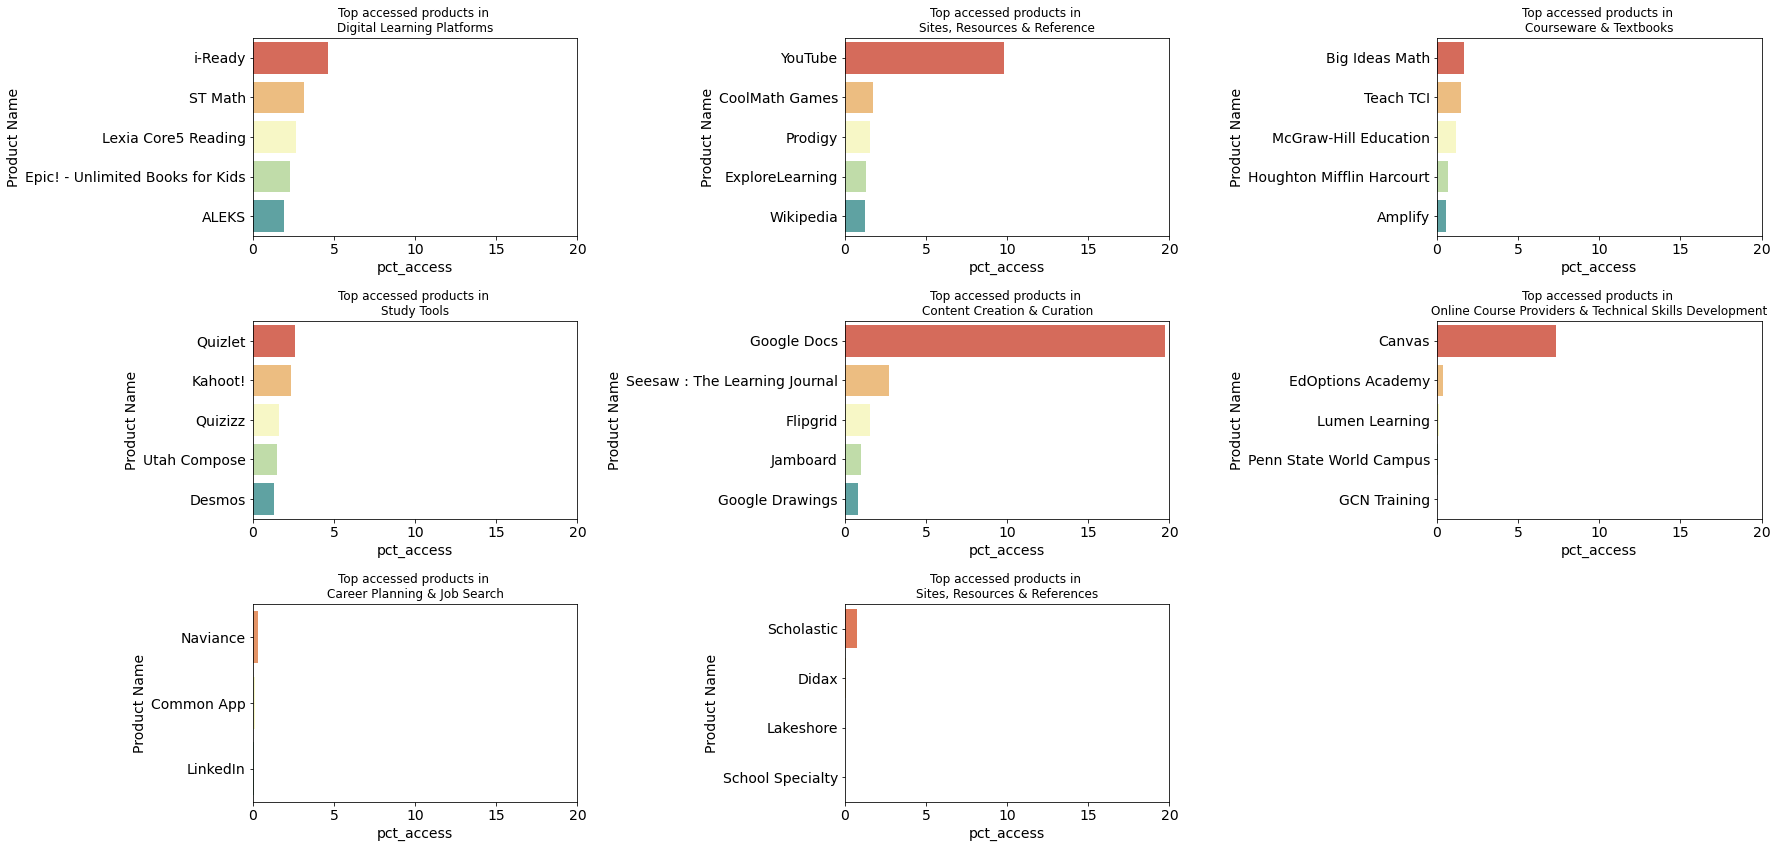

In [58]:
f, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (25,12))


x = 0
y = 0

for subcategory in product[product.primary_essential_category == 'LC'].primary_essential_subcategory.unique():
    product_ids = product[product.primary_essential_subcategory == subcategory]['LP ID'].unique()
    dummy = engagement_updated[engagement_updated.lp_id.isin(product_ids)]
    dummy = dummy.groupby('lp_id').pct_access.mean().sort_values(ascending = False).to_frame().reset_index(drop = False)
    dummy = dummy.merge(product[['LP ID', 'Product Name']], left_on = 'lp_id', right_on = 'LP ID').head()
    sns.barplot(data = dummy, x = 'pct_access', y = 'Product Name', palette = 'Spectral', ax = ax[x, y])
    
    ax[x, y].set_title(f'Top accessed products in \n{subcategory}', fontsize = 12)
    ax[x, y].set_xlim([0, 20])
    
    y = y + 1
    if y == 3:
        x = x + 1
        y = 0
       
f.delaxes(ax[2, 2]) 

plt.tight_layout()
plt.show()
    

# 

# <div style="text-align: Left"><span style="color:#08838b; font-family:Georgia;">Geo-Information analysis of the Dataset</span></div>

In [59]:
from geopy.geocoders import Nominatim

lat=[]
lon=[]

geo_locations=pd.DataFrame({"States":district['state'].unique()})
geolocator=Nominatim(user_agent="Kaggle")

for location in geo_locations['States']:
    location = geolocator.geocode(location)    
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)



geo_locations['lat']=lat
geo_locations['lon']=lon


In [60]:
len(geo_locations)

23

In [61]:
geo_locations.columns

Index(['States', 'lat', 'lon'], dtype='object')

<div style="text-align: justify"><span style="color:#000000; font-family:Georgia; font-size:1.2em;">Getting the count of each state in the district dataset</span></div>

In [62]:
state_name = district.state.value_counts().to_frame()
state_name.reset_index(level=0, inplace=True)
state_name.columns = ['States', 'count']

In [63]:
state_name.head()

,States,count
0,Connecticut,30
1,Utah,29
2,Massachusetts,21
3,Illinois,18
4,California,12


In [64]:
geo_locations.head()

,States,lat,lon
0,Illinois,40.079661,-89.433729
1,Utah,39.422519,-111.714358
2,Wisconsin,44.430898,-89.688464
3,North Carolina,35.672964,-79.039292
4,Missouri,38.760481,-92.561787


In [65]:
geo_locations = geo_locations.merge(state_name, left_on = 'States', right_on = 'States')

In [66]:
geo_locations = geo_locations.sort_values(by = 'count', ascending = False).reset_index(drop = True)

In [67]:
geo_locations.head(23)

,States,lat,lon,count
0,Connecticut,41.650020,-72.734216,30
1,Utah,39.422519,-111.714358,29
2,Massachusetts,42.378877,-72.032366,21
3,Illinois,40.079661,-89.433729,18
4,California,36.701463,-118.755997,12
5,Ohio,40.225357,-82.688140,11
6,New York,40.712728,-74.006015,8
7,Indiana,40.327013,-86.174693,7
8,Washington,38.894992,-77.036558,6
9,Missouri,38.760481,-92.561787,6


In [68]:
center = [39.8097343, -98.5556199]
map_us = folium.Map(location = center, zoom_start = 4, tiles ='Stamen Terrain')

In [69]:
pct_access_data = pd.DataFrame(engagement[['state', 'pct_access']].groupby(['state'])['pct_access'].mean())
engagement_data = pd.DataFrame(engagement[['state', 'engagement_index']].groupby(['state'])['engagement_index'].mean())

In [70]:
geo_locations1 = geo_locations.merge(pct_access_data, left_on = 'States', right_on = 'state')

In [71]:
geo_locations1 = geo_locations1.merge(engagement_data, left_on = 'States', right_on = 'state')

In [72]:
geo_locations1.apply(lambda row: folium.Marker(location = [row['lat'], \
    row['lon']], tooltip = '''<center><b> %s </b></center><br>pct_access : <b> %s </b><br>Engagement_index : <b> %s </b><br>''' \
    % (row.States, row.pct_access, row.engagement_index), icon = folium.Icon(color = 'gray', icon = "fa-laptop", prefix ='fa')).add_to(map_us), axis = 1)
map_us